Name:
# Prelim 1 CEE 4520
Open book, open internet.

Note that total points for the exam = 106

# Multiple choice (4 points each)

**Bold** the correct answer

 1) How far away from the location where the chemical dose is set is the flocculator in an AguaClara plant (pick the answer that is the best approximation)?

    a) **1 m**

    b) 5 m

    c) 10 m

    d) 20 m

2) Which equation can be used when there is a loss (or increase) of mechanical energy?

    a) **Energy Equation**

    b) Bernoulli Equation

3) What happens to the maximum energy dissipation rate in a plane jet if velocity is held constant and the width of the jet is increased?

    a) The maximum energy dissipation rate increases

    b) The maximum energy dissipation rate remains constant

    c) **The maximum energy dissipation rate decreases**

4) Which type of head loss increases linearly with flow rate?

    a) **Laminar flow major loss**

    b) Laminar flow minor loss

    c) Turbulent flow major loss

    d) Turbulent flow minor loss

# Short Answer (4 points each)

1) What is the dimensionless *vena contracta* coefficient a ratio of?

   The *vena contracta* coefficient is the ratio of the contracted flow area to the orifice area

2) Identify a location in an AguaClara entrance tank where the Bernoulli equation can be used to describe the flow. Explain WHY the Bernoulli equation can be used.

   LFOM. The flow contracts as it flows through an orifice and Bernoulli applies in a flow contraction because mechanical energy is conserved.
   Rapid mix orifice. Bernoulli equation could be used to find the pressure in the contraction.

3) What happens to the coagulant dose (assuming the operator doesn't change anything) in an AguaClara plant when the flow rate through the plant changes from the plant maximum design flow to 50% of the maximum design flow?

   The coagulant dose remains constant.

4) What is Monroe's hypothesis for why primary particles such as clay and pathogens can't attach to flocs in a flocculator?

   The flocs are rotating in the shear flow and are dragging a viscous boundary layer of fluid as they rotate. This boundary layer means that there is no stagnation point on the floc and thus streamlines stay far from the floc surface and small particles don't ever come into contact with the floc.

5)  Give one example each of a minor loss and a major loss in AguaClara plants

    - Major Losses - chemical dosing tubes,
    - Minor Losses - Flocculator baffles, LFOM orifices





# Design Challenges
Document your work. Show any equations that you use in latex. Then do the calculation in python. Simplify the units to something that is easy to understand (SI metric system please!). Print your answer in python and copy that answer and paste it into markdown so your answer is shown without needing to run the code.

Here are some import statements that will likely be helpful. You may, of course, import other packages if needed!




In [0]:
!pip install aguaclara
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 163kB 8.6MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.1.11-cp36-none-any.whl size=95285 sha256=c00e5eaa4bd54e7d047e65ef508676dc31577e19a2579191cef9bc67a0634905
  Stored in directory: /root/.cache/pip/wheels/a1/ad/c5/e96ac826e86efac64c84f2005c9edabd23c3df15ad20e6ef18
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134155 sha256=b20ebd5a94016cb1755fdcaa72640c70a53060c01ce078f48881507e80547fb7
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


1) Water at $15^\circ C$ flows through a straight, smooth tube that is 1/8th inch in inner diameter, 2 m long, has a head loss of 20 cm, and has total minor loss coefficients for entrance and exit of 4.
a) (5 points) What is the flow rate?
b) (5 points) Is this flow laminar or turbulent?





In [0]:
Inner_diameter = 1/8 * u.inch
L_tube = 2 * u.m
K_tube = 4
head_loss_tube = 20 * u.cm
Rough_tube = 0 * u.m
T_water = 15 * u.degC
Nu = ac.viscosity_kinematic(T_water)
Q_tube = (ac.flow_pipe(Inner_diameter, head_loss_tube, L_tube, Nu, Rough_tube, K_tube)).to(u.mL/u.s)
print('The flow rate through the tube will be',ac.round_sig_figs(Q_tube,3))
Re_tube = ac.re_pipe(Q_tube,Inner_diameter,Nu)
print('The Reynolds number for this flow is', ac.round_sig_figs(Re_tube,2), 'and the flow is laminar.')

The flow rate through the tube will be 2.01 milliliter / second
The Reynolds number for this flow is 710.0 and the flow is laminar.


2) (10 points) A mechanical hydraulic mix unit for a 3 mgd (million gallon per day) water treatment plant has a residence time of 30 seconds and a $G_{CS}$ of 1000 Hz. Estimate the cost of this energy per year.  You may neglect the fact that the designer had to round up to next available motor size. You may assume that the rapid mix unit is 80% efficient at converting electricity into fluid shear. The temperature ranges from $0 \circ C$ to $30 \circ C$. The unit was designed to deliver the target fluid deformation for the worst case temperature. The cost of electricity is 0.15 USD/(kW hr).

$$P = \rho \bar G^2 \nu Q \theta$$

In [0]:
Q = 3 * u.Mgal/u.day
t = 30 * u.s
G = 1000 * u.Hz
efficiency = 0.8
Temp = 0 * u.degC
rho = ac.density_water(Temp)
nu = ac.viscosity_kinematic(Temp)
Power = (rho * G**2 * nu * Q * t / efficiency).to(u.kW)
Electricity_cost = 0.15 * u.USD / (u.kW * u.hr)
rapid_mix_energy_cost = (Power * Electricity_cost).to(u.kUSD/u.year)
print('The rapid mix energy costs',ac.round_sig_figs(rapid_mix_energy_cost,2))


The rapid mix energy costs 11 kilodollar / year


3) A flocculator designed using the AguaClara code has a design flow of 20 L/s and a design temperature of $15^\circ C$.  You may use the flocculator code to check you answer, but do the calculation using an equation that you derive.

   a) (5 points) Calculate the Camp Stein velocity gradient, $G_{CS}$, for the flocculator based on the flow characteristics and geometry of one flow expansion.

   b) (5 points) Calculate the residence time for one flow expansion based on the flow characteristics and geometry of that expansion.

   c) (5 points) Calculate the $G_{CS}\theta$ for one flow expansion

   d) (5 points) Calculate the number of flow expansions required given the design goal of $G_{CS} = 37,000 $.


solution
$$\nu G_{CS}^2 = \frac{K}{2 H_e} \left( \frac{Q}{W S} \right)^3$$
$$G_{CS} = \sqrt{\frac{K}{2 \nu  H_e} \left( \frac{Q}{W S} \right)^3}$$

In [0]:
Q_design=20 * u.L/u.s
temp=15 * u.degC
myF = ac.Flocculator(Q=Q_design, temp=15 * u.degC)
myF.vel_grad_avg

<Quantity(93.24255814245437, '1 / second')>

In [0]:
G_one_expansion = ((myF.BAFFLE_K / (2 * ac.viscosity_kinematic(temp) * myF.expansion_h) * (Q / (myF.chan_w * myF.baffle_s))**3)**(1/2)).to(u.Hz)
print('a) The Camp Stein velocity gradient is ',ac.round_sig_figs(G_one_expansion,2))
t_one_expansion = ((myF.expansion_h * myF.chan_w * myF.baffle_s)/Q_design).to(u.s)
print('b) The residence time in one expansion is ',ac.round_sig_figs(t_one_expansion,2))
Gt_one_expansion = (G_one_expansion * t_one_expansion).to(u.dimensionless).magnitude
print('c) The Gt for one flow expansion is ',ac.round_sig_figs(Gt_one_expansion,2))
N_expansions = myF.gt/Gt_one_expansion
print('d) The required number of flow expansions is ',ac.round_sig_figs(N_expansions,2))

a) The Camp Stein velocity gradient is  1600 hertz
b) The residence time in one expansion is  5 second
c) The Gt for one flow expansion is  7900.0
d) The required number of flow expansions is  4.7


4) (15 points) Plot $G_{CS}\theta$ for the flocculator in problem 3 if it is built and then operated over a range of flows from 25% to 100% of the design flow. Start by deriving an equation for $G_{CS}\theta$ that accounts for the fact that the flocculator is built (geometry is constant) and the flow rate is varying.

In the equations below $Q$ is varying and $Q_{design}$ is a constant.
$$G_{CS} = \sqrt{\frac{K}{2 \nu  H_e} \left( \frac{Q}{W S} \right)^3}$$
$$ \theta = \frac{Volume}{Q} $$
$$ Volume = \theta_{design} Q_{design}$$
$$ \theta = \frac{\theta_{design} Q_{design}}{Q} $$
$$G_{CS}\theta =\frac{\theta_{design} Q_{design}}{Q} \sqrt{\frac{K}{2 \nu  H_e} \left( \frac{Q}{W S} \right)^3}$$

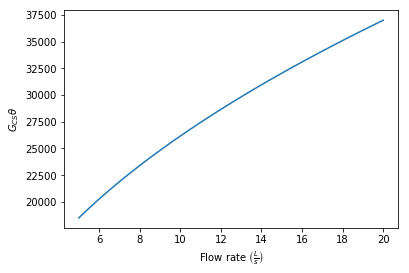

In [0]:
datapoints = 50
temp = 14 * u.degC
Q_design = 20 * u.L/u.s
myF = ac.Flocculator(Q=Q_design, temp=temp)
Q_graph = np.linspace(0.25,1,datapoints) * Q_design
nu = ac.viscosity_kinematic(temp)
Gt = np.zeros(datapoints)

for i in range(0,datapoints):
  Gt[i] = (myF.retention_time * Q_design/Q_graph[i] * np.sqrt(myF.BAFFLE_K /(2* nu * myF.expansion_h) * (Q_graph[i]/(myF.chan_w *myF.baffle_s))**3)).to(u.dimensionless).magnitude
plt.plot(Q_graph, Gt);
plt.ylabel(r'$G_{CS}\theta$');
plt.xlabel(r'Flow rate $\left(\frac{L}{s}\right)$');
plt.show()

5) One of our goals it to produce water that is dramatically cleaner than regulations require.

    a) (5 points) How far apart will clay particles (equivalent spherical diameter of $5 \mu m$ and density of $2650 \frac{kg}{m^3}$) be if their concentration is 0.01 mg/L?

    b) (5 points) What is the mass of a clay particle?

    c) (5 points) How many clay particles would there be in a 250 mL glass of water?

In [0]:
Clay_C = 0.01 * u.mg/u.L
Clay_D = 5 * u.um  
Clay_Density = 2650 * u.kg/u.m**3
ave_sep_dist_clay = (Clay_D * (np.pi/6 * Clay_Density/Clay_C)**(1/3)).to(u.mm)
print('a) The average separation distance is',ac.round_sig_figs(ave_sep_dist_clay,2))
Clay_Mass =( Clay_Density * np.pi/6 * Clay_D**3).to(u.pg)
print('b) The mass of single clay particle is',ac.round_sig_figs(Clay_Mass,2))
Cup_volume = 250 * u.mL
Clay_N = (Cup_volume /ave_sep_dist_clay**3).to(u.dimensionless).magnitude
print('c) The number of clay particles in a glass of water would be',ac.round_sig_figs(Clay_N,2))

a) The average separation distance is 2.6 millimeter
b) The mass of single clay particle is 170 picogram
c) The number of clay particles in a glass of water would be 14000.0
